# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merged_data = mouse_metadata.merge(study_results,on=["Mouse ID"])
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [89]:
# Checking the number of mice.
total= len(pd.unique(merged_data['Mouse ID']))
total

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)])
#dups

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [91]:
total= len(pd.unique(merged_data['Mouse ID']))
total

249

In [92]:
merged_data.loc[merged_data.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
#Set Index to Delete 
merged_data = merged_data.set_index('Mouse ID')
merged_data.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [94]:
merged_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data = merged_data.drop(['g989'])
merged_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [96]:
# Checking the number of mice in the clean DataFrame.
#total= len(pd.unique(merged_data['Mouse ID']))
#total
merged_data = merged_data.reset_index()

In [97]:
total= len(pd.unique(merged_data['Mouse ID']))
total

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = merged_data.groupby(['Drug Regimen'])

tumor_volume = drug_regimen['Tumor Volume (mm3)']
#tumor_volume

mean_numpy = tumor_volume.mean()
#mean_numpy

median_numpy = tumor_volume.median()
#median_numpy

#mode_scipy = st.mode(tumor_volume)
#mode_scipy

standard_dev = tumor_volume.std()

variance = tumor_volume.var()

standard_err = tumor_volume.sem()

tumor_vol_df = pd.DataFrame({
                        "Mean": mean_numpy,
                        "Median" : median_numpy,
                        "Standard Deviation" : standard_dev,
                        "Variance" : variance,    
                        "Standard Error Mean (SEM)" : standard_err
                        })



In [99]:
print(tumor_vol_df)

                   Mean     Median  Standard Deviation   Variance  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809            4.994774  24.947764   
Ceftamin      52.591172  51.776157            6.268188  39.290177   
Infubinol     52.884795  51.820584            6.567243  43.128684   
Ketapril      55.235638  53.698743            8.279709  68.553577   
Naftisol      54.331565  52.509285            8.134708  66.173479   
Placebo       54.033581  52.288934            7.821003  61.168083   
Propriva      52.320930  50.446266            6.622085  43.852013   
Ramicane      40.216745  40.673236            4.846308  23.486704   
Stelasyn      54.233149  52.431737            7.710419  59.450562   
Zoniferol     53.236507  51.818479            6.966589  48.533355   

              Standard Error Mean (SEM)  
Drug Regimen                             
Capomulin                      0.329346  
Ceftamin                       0.469821  
Inf

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

merged_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#drug_regimen_sum = merged_data.groupby(['Drug Regimen']).sum()
#df2 = merged_data.groupby(['Drug Regimen'])['Drug Regimen'].count()
#df2

df2 = merged_data.groupby(['Drug Regimen']).size().reset_index(name='counts')
df2

,Drug Regimen,counts
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Drug Regimen')

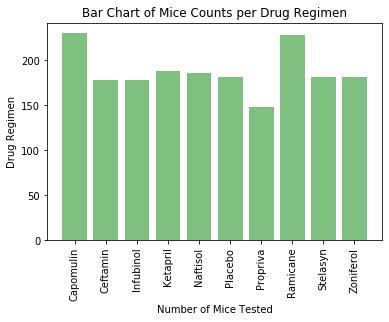

In [102]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts= df2['counts']
regimens = df2['Drug Regimen']
x_axis = np.arange(len(regimens))

plt.bar(x_axis, counts, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)
plt.xticks(rotation=90)

plt.title("Bar Chart of Mice Counts per Drug Regimen")
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regimen")

In [103]:
df3 = merged_data.groupby(['Sex']).size().reset_index(name='counts')
df3

,Sex,counts
0,Female,922
1,Male,958


Text(0, 0.5, '')

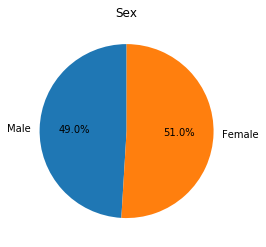

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = df3['counts']
pie_plot = counts.plot.pie(autopct="%1.1f%%", startangle=90, title='Sex' ,labels=['Male','Female'])

# Hide the 'y' label
pie_plot.set_ylabel('')

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

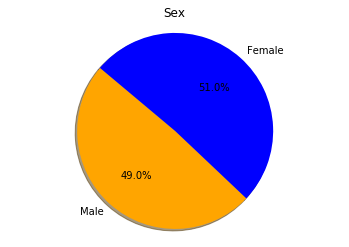

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ["orange", "blue"]
values=df3['counts']
plt.pie(values,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Sex')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = merged_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index(name='max_tp')
timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df2 = pd.merge(merged_data, timepoint, on='Mouse ID')
merged_df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_tp
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [83]:
regimens

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [112]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
capo_reg = []
ceft_reg = []
infu_reg = []
rami_reg = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for index, row in merged_df2.iterrows(): 
    
    mouse_reg = row["Drug Regimen"]
    
    if mouse_reg == regimens[0]:
        capo_reg.append(row['Tumor Volume (mm3)'])

    elif mouse_reg == regimens[1]:
        ceft_reg.append(row['Tumor Volume (mm3)'])

    elif mouse_reg == regimens[2]:
        infu_reg.append(row['Tumor Volume (mm3)'])
            
    elif mouse_reg == regimens[3]:
        rami_reg.append(row['Tumor Volume (mm3)']) 
            
             
    # Determine outliers using upper and lower bounds
capo_reg_df = pd.DataFrame ({
                  regimens[0]: capo_reg
                    })

                
#print (len(capo_reg))
#print (len(ceft_reg))
#print (len(infu_reg))
#print (len(rami_reg))

#for index, row in regimens.iterrows(): 
    
    #if row == 'Capomulin':
        #print ('A')
       
capo_reg_df
#mouse_reg_df
#rami_reg

,Capomulin
0,45.000000
1,43.878496
2,37.614948
3,38.177232
4,36.866876
...,...
225,47.685963
226,45.000000
227,45.597064
228,46.059608


In [118]:
#Determine outliers using upper and lower bounds - Campomulin

#df = pd.DataFrame (capo_reg, columns = ['Tumor Volume (mm3)'])
capo_df = merged_df2.loc[merged_df2["Drug Regimen"] == "Capomulin",:]

#cap_df

capo_tumor_vol = capo_df["Tumor Volume (mm3)"]

#cap_tumor_vol

quartiles = capo_tumor_vol.quantile([.25,.5,.75])
#quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Campomulin is: {lowerq}")
print(f"The upper quartile of Campomulin is: {upperq}")
print(f"The interquartile range of Campomulin is: {iqr}")
print(f"The the median of Campomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Campomulin is: 37.685932865
The upper quartile of Campomulin is: 45.0
The interquartile range of Campomulin is: 7.314067135000002
The the median of Campomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [119]:
#Determine outliers using upper and lower bounds - Ceftamin

#df = pd.DataFrame (capo_reg, columns = ['Tumor Volume (mm3)'])
ceft_df = merged_df2.loc[merged_df2["Drug Regimen"] == "Ceftamin",:]

#cap_df

ceft_tumor_vol = ceft_df["Tumor Volume (mm3)"]

#cap_tumor_vol

quartiles = ceft_tumor_vol.quantile([.25,.5,.75])
#quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The the median of Ceftamin is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


In [120]:
#Determine outliers using upper and lower bounds - Infubinol
#df = pd.DataFrame (capo_reg, columns = ['Tumor Volume (mm3)'])
infu_df = merged_df2.loc[merged_df2["Drug Regimen"] == "Infubinol",:]

#cap_df

infu_tumor_vol = infu_df["Tumor Volume (mm3)"]

#cap_tumor_vol

quartiles = infu_tumor_vol.quantile([.25,.5,.75])
#quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [121]:
#Determine outliers using upper and lower bounds - Ramicane
#df = pd.DataFrame (capo_reg, columns = ['Tumor Volume (mm3)'])
rami_df = merged_df2.loc[merged_df2["Drug Regimen"] == "Ramicane",:]

#cap_df

rami_tumor_vol = rami_df["Tumor Volume (mm3)"]

#cap_tumor_vol

quartiles = rami_tumor_vol.quantile([.25,.5,.75])
#quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


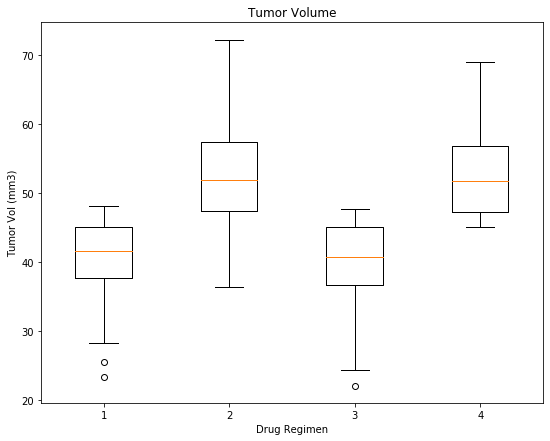

In [145]:

#d1= np.array(capo_df)
#capo_plot = [capo_df]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
#ax1.set_ylabel('Temperature (°F)')
#ax1.boxplot(capo_plot)
#plt.show()

boxplot_list = [capo_reg, infu_reg, rami_reg, ceft_reg]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Tumor Volume') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable

ax.boxplot(boxplot_list)

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [146]:
capo_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_tp
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


Text(0, 0.5, 'Tumor Volume (mm3)')

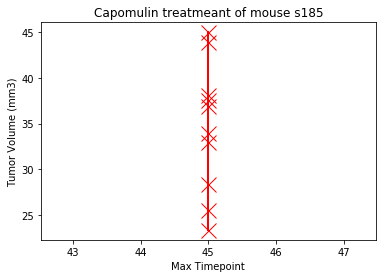

In [151]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_capo = capo_df.loc[capo_df["Mouse ID"] == "s185",:]
mouse_capo.head()
x_axis = mouse_capo["max_tp"]
y_axis = mouse_capo["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="x",color="red")
plt.xlabel('Max Timepoint')
plt.ylabel('Tumor Volume (mm3)')


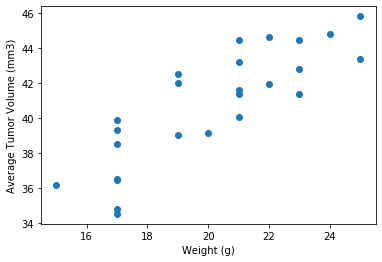

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


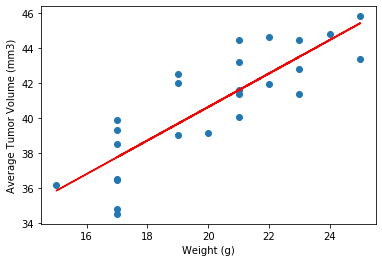

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

